# Feature Import

In [1]:
# Manipulação de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Métricas de Avaliação: Classificação
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay

# Modelos Utilizados
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [25]:
dfs = pd.read_excel("../data/dados.xlsx", sheet_name = None, index_col = "Empresa")
print("DataFrames disponíveis: ", list(dfs.keys())) # representam indicadores de anos antes da falência

n = int(input("\nSelecione dados de 1 a 5 anos pré-falência: "))

DataFrames disponíveis:  ['df_1y', 'df_2y', 'df_3y', 'df_4y', 'df_5y']

Selecione dados de 1 a 5 anos pré-falência: 1


In [28]:
df = dfs[list(dfs.keys())[0]]
df.head()

,Dispon/PC,Dispon/Receita Liq Operacional,Dispon/AC,Dispon/AT,AC/PC,AC/AT,PC/AT,PC/Receita Liq Operacional,Estoque/AT,Quick assets/AT,...,VA/IMOBILIZADO,VA/AT,VA/RLO,Contas a pagar/RLO,AC/RLO,Estoque/RLO,NOWC/RLO,Contas a receber/RLO,RLO/AT,Alvo
Empresa,,,,,,,,,,,,,,,,,,,,,
BOMBRIL,0.037400,0.022244,0.101842,0.029547,0.367232,0.290121,0.790021,0.594763,0.031404,0.258718,...,1.912136,0.573094,0.431451,0.095822,0.218416,0.023642,-0.112902,0.130422,1.328294,1
COSAN,1.644152,0.042668,0.535983,0.063081,3.067545,0.117692,0.038367,0.025951,0.012073,0.105619,...,-94.153913,-0.273755,-0.185168,0.004062,0.079607,0.008166,0.0563916,0.009919,1.478415,0
TUPY,1.260625,0.444879,0.556159,0.265093,2.266661,0.476648,0.210287,0.352903,0.067499,0.409149,...,-0.199108,-0.066526,-0.111644,0.086110,0.799912,0.113277,0.613744,0.158185,0.595876,0
JHSF,0.120848,0.302694,0.131172,0.029345,0.921291,0.223713,0.242825,2.504754,0.011262,0.212451,...,0.251439,0.024086,0.248451,0.153724,2.307607,0.116165,0.742789,0.477655,0.096946,0
KLABIN,1.533708,0.593607,0.565686,0.182988,2.711236,0.323480,0.119311,0.387041,0.033246,0.290234,...,0.011016,0.006816,0.022112,0.075016,1.049359,0.107850,0.875408,0.248967,0.308265,0


# Feature Engineering

In [ ]:
df.dropna(inplace = True)

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop("Alvo", axis = 1)
y = df["Alvo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Modelling

### Logistic Regression

In [102]:
modelo = LogisticRegression(max_iter = 1000, random_state = 42)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<AxesSubplot:title={'center':'Probabilidades'}>

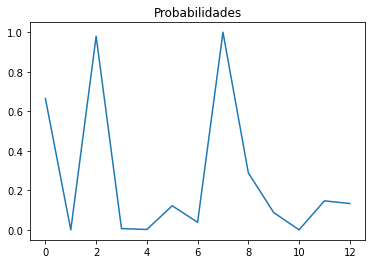

In [103]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [104]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[23  0]
 [ 0 14]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        14

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [105]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[6 2]
 [4 1]]

0.5384615384615384

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.33      0.20      0.25         5

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



AUC - Teste : 0.475


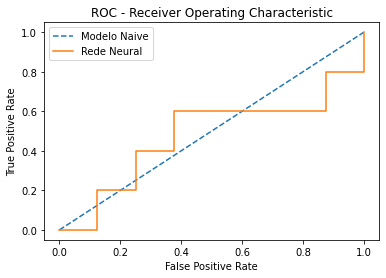

In [106]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

O threshold ótimo é de:  0.225


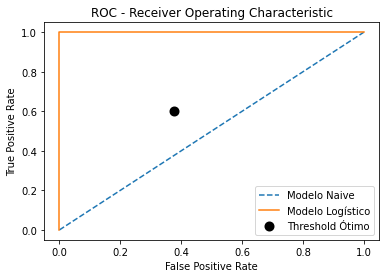

In [107]:
# Otimização
i = np.arange(len(tpr))
df_thresholds = pd.DataFrame({'fpr' : pd.Series(fpr, index = i),
                          'tpr' : pd.Series(tpr, index = i), # sensibilidade
                          '1-fpr' : pd.Series(1-fpr, index = i), # especificidade
                          'J' : pd.Series(tpr + (1 - fpr) - 1, index = i), # sensibilidade + especificidade -1
                          'threshold' : pd.Series(thresholds, index = i)}) # thresholds testados

df_thresholds = df_thresholds.sort_values(by = "J", ascending = False)
corte = df_thresholds.iloc[0]["J"]
print("O threshold ótimo é de: ", round(corte, 3))

# Criando Curva ROC
y_pred_proba = modelo.predict_proba(X_train)[::,1] # Probabilidade de Y = 1 
fpr, tpr, thresholds = roc_curve(y_train,  y_pred_proba)

plt.scatter(df_thresholds.iloc[0]["fpr"], df_thresholds.iloc[0]["tpr"], marker = 'o', color='black', label='Threshold Ótimo', linewidth = 4)
plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Modelo Logístico')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Random Forest

Hiperparâmetros a serem otimizados:

* n_estimators -> número de árvores distintas estimadas (padrão: 10 -> pode ser muito pequeno)
* max_features -> número máximo de variáveis independentes a ser considerado em cada nó das árvores de decisão (padrão: raiz quadrada da quantidade de variáveis independentes imputada ao modelo, o que é uma boa medida)

In [80]:
modelo = RandomForestClassifier(random_state = 42) # gera um modelo aleatório a cada vez que rodamos o código
modelo.fit(X_train, y_train)

<AxesSubplot:title={'center':'Probabilidades'}>

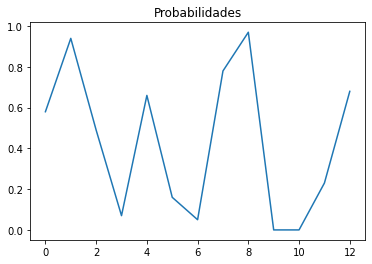

In [83]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [84]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[23  0]
 [ 0 14]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        14

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [87]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[6 2]
 [1 4]]

0.7692307692307693

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13



AUC - Teste : 0.9


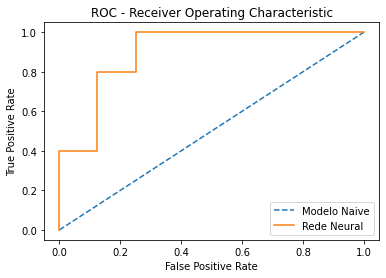

In [85]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Neural Network

Hiperparâmetros a serem otimizados:

* hidden_layer_sizes -> tupla contendo o número de neurônios dentro de cada camada (padrão: uma camada de 100 neurons)
* max_iter -> número máximo de iterações a serem realizadas pelo método de backpropagation
* alpha -> o valor máximo de alteração dos coeficientes em cada iteração, para minimizar a função de custo (padrão: 0.0001)
* solver -> Algoritmo utilizado para encontrar a solução ótima, cujo tempo de obtenção da resposta varia. Opções: 'lbfgs', 'sgd' e 'adam'.

In [89]:
modelo = MLPClassifier(random_state = 42, max_iter = 100, verbose = True) # gera um modelo aleatório a cada vez que rodamos o código
modelo.fit(X_train, y_train)

Iteration 1, loss = 1.88100423
Iteration 2, loss = 1.69694058
Iteration 3, loss = 1.51681820
Iteration 4, loss = 1.34186735
Iteration 5, loss = 1.17252308
Iteration 6, loss = 1.01260367
Iteration 7, loss = 0.88439993
Iteration 8, loss = 0.79178952
Iteration 9, loss = 0.71270228
Iteration 10, loss = 0.64230828
Iteration 11, loss = 0.57883591
Iteration 12, loss = 0.52303980
Iteration 13, loss = 0.47737675
Iteration 14, loss = 0.44271347
Iteration 15, loss = 0.41628278
Iteration 16, loss = 0.39496735
Iteration 17, loss = 0.37701322
Iteration 18, loss = 0.36152702
Iteration 19, loss = 0.34810514
Iteration 20, loss = 0.33651902
Iteration 21, loss = 0.32645381
Iteration 22, loss = 0.31746698
Iteration 23, loss = 0.30896977
Iteration 24, loss = 0.30037298
Iteration 25, loss = 0.29139318
Iteration 26, loss = 0.28210195
Iteration 27, loss = 0.27283500
Iteration 28, loss = 0.26384443
Iteration 29, loss = 0.25531409
Iteration 30, loss = 0.24731509
Iteration 31, loss = 0.23985050
Iteration 32, los

C:\Users\Bruno Marcelino\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100, random_state=42, verbose=True)

<AxesSubplot:title={'center':'Probabilidades'}>

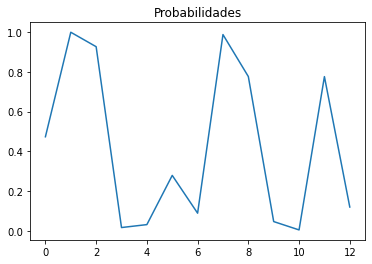

In [90]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [91]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[23  0]
 [ 0 14]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        14

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [92]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[6 2]
 [2 3]]

0.6923076923076923

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.60      0.60      0.60         5

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13



AUC - Teste : 0.7


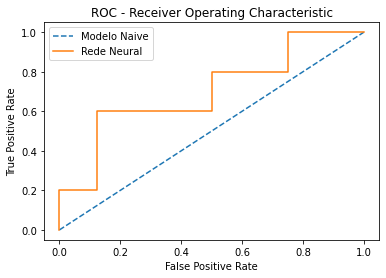

In [93]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Loss Curve'}>

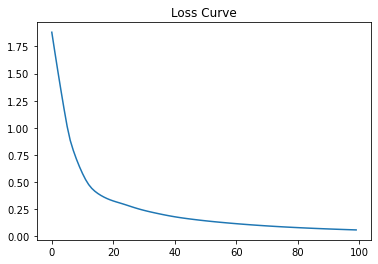

In [94]:
# Curva de Custo
pd.Series(modelo.loss_curve_).plot(title = "Loss Curve")